# Prediction of mental status from structural MRI and demographics via multi-input deep learning

## Locate data for the project.
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

#### [Dallas Lifespan Brain Study (DLBS)](http://fcon_1000.projects.nitrc.org/indi/retro/dlbs.html): _all data files are in .tar.gz format_
 - [Cognitive data](ftp://www.nitrc.org/fcon_1000/htdocs/indi/retro/dlbs_content/dlbs_cogdata.tar.gz)
 - [Neuroimaging data](ftp://www.nitrc.org/fcon_1000/htdocs/indi/retro/dlbs_content/dlbs_imaging.tar.gz)
  - [Anatomical scan parameters](ftp://www.nitrc.org/fcon_1000/htdocs/indi/retro/dlbs_content/dlbs_scan_params_anat.pdf)
  - [PET scan parameters](ftp://www.nitrc.org/fcon_1000/htdocs/indi/retro/dlbs_content/dlbs_scan_params_pet.pdf)
 - [Genetic data](ftp://www.nitrc.org/fcon_1000/htdocs/indi/retro/dlbs_content/dlbs_genetics.tar.gz)

## Import the data.
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [1]:
# import relevant libraries
from pathlib import Path # path management
import ftplib # ftp server access for source data file download
import time # operation timers
import tarfile # read tar.gz archive source data files
import pandas as pd # data wrangling and tabular representation
import seaborn as sb # data visualization

In [2]:
# return current working directory
Path.cwd()

PosixPath('/home/faysal/fshaikh4-GitHub/final-project')

#### Data import via `FTP` module below has been commented-out due to issues downloading neuroimaging dataset.

As an alternative, appropriate files (in their unmodified `.tar.gz` archive format) were copied and pasted into `./data/` and utilized in downstream prepreprocessing steps.

In [3]:
# # create './data/' dir in cwd, if not existing (but do not overwrite)
# Path('./data/').mkdir(exist_ok=True)

In [4]:
# specify URLs for source data files
ftp_url = 'www.nitrc.org'
ftp_path = 'fcon_1000/htdocs/indi/retro/dlbs_content/'

cog_fname = 'dlbs_cogdata.tar.gz'
ni_fname = 'dlbs_imaging.tar.gz'
gen_fname = 'dlbs_genetics.tar.gz'

anat_parm_fname = 'dlbs_scan_params_anat.pdf'
pet_parm_fname = 'dlbs_scan_params_pet.pdf'

In [5]:
# # start timer object
# t_i = time.time()

# # use FTP to access and download source data files (ONCE ONLY)
# ftp = ftplib.FTP(ftp_url)
# ftp.login()
# ftp.cwd(ftp_path)
# ftp.retrbinary('RETR ' + cog_fname, open('./data/' + cog_fname, 'wb').write)
# ftp.retrbinary('RETR ' + ni_fname, open('./data/' + ni_fname, 'wb').write)
# ftp.retrbinary('RETR ' + gen_fname, open('./data/' + gen_fname, 'wb').write)
# ftp.retrbinary('RETR ' + anat_parm_fname, open('./data/' + anat_parm_fname, 'wb').write)
# ftp.retrbinary('RETR ' + pet_parm_fname, open('./data/' + pet_parm_fname, 'wb').write)
# ftp.quit();

# # end timer object
# t_f = time.time()

# # print elapsed time
# print('Time elapsed: '+str(t_f - t_i)+' seconds.')

#### After obtaining relevant data files in raw `.tar.gz` archive file format, relevant data were extracted and utilized in downstream preprocessing.

In [6]:
# create extracted data subdirectories
Path('./data/cogdata/').mkdir(exist_ok=True) # create dir if not existing
Path('./data/imaging/').mkdir(exist_ok=True) # create dir if not existing
Path('./data/genetics/').mkdir(exist_ok=True) # create dir if not existing

In [8]:
# # extract relevant data files from .tar.gz archives
# import tarfile

# # extract cognitive data
# tar = tarfile.open('./data/' + cog_fname, 'r:gz')
# tar.extractall(path = './data/cogdata/')
# tar.close()

# # extract neuroimaging data
# tar = tarfile.open('./data/' + ni_fname, 'r:gz')
# tar.extractall(path = './data/imaging/')
# tar.close()

# # extract genetics data
# tar = tarfile.open('./data/' + gen_fname, 'r:gz')
# tar.extractall(path = './data/genetics/')
# tar.close()

Initial preprocessing steps were performed to combine relevant CSV files.

In [50]:
# initial read-in of subject information and genetics into pandas.DataFrame objects
subjects = pd.read_table('./data/cogdata/Cognitive_data/Subject_Information.csv', sep=',')
gen_data = pd.read_table('./data/genetics/dlbs_genetics.csv', sep=',')

In [41]:
# show colnames of dataframes
print(subjects.columns, '\n\n', gen_data.columns)

Index(['INDI_ID', 'Age', 'Gender', 'EducationYears', 'What_is_your_race',
       'Please_specify_your_race', 'What_is_your_ethnicity', 'HAND_Likert',
       'MMSE', 'MonthsMRI-PET'],
      dtype='object') 

 Index(['INDI_ID', 'APOE genotype',
       'Carrier status ("1" means APOE carrier, "0" non-carrier)'],
      dtype='object')


In [63]:
# select relevant features
subjects = subjects[['INDI_ID', 'Age', 'Gender', 'EducationYears', 'MMSE']]
gen_data = gen_data[[gen_data.columns[0], gen_data.columns[-1]]]

In [64]:
# consolidation into single pandas.DataFrame object
merged = subjects.merge(gen_data, left_on='INDI_ID', right_on='INDI_ID', suffixes=(False, False))

In [71]:
# rename columns for ease of downstream use
merged.rename(columns={'INDI_ID':'id',
                       'Age':'age',
                       'Gender':'sex',
                       'EducationYears':'educ',
                       'MMSE':'mmse',
                       'Carrier status ("1" means APOE carrier, "0" non-carrier)':'apoe4'
                      },
             inplace=True)

In [72]:
merged.head(5)

,id,age,biol_sex,educ,mmse,apoe4
0,28374,55.62,f,19.0,30,1
1,28545,72.25,f,18.0,29,0
2,28344,69.81,f,12.0,27,1
3,28392,54.85,f,18.0,30,0
4,28479,40.93,m,12.0,28,0


## Visualize neuroimaging data.

In [3]:
from nilearn import plotting
%matplotlib inline
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

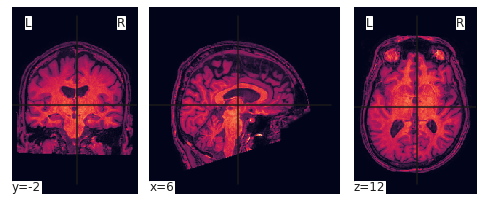

In [18]:
# plot first structural MRI scan we can find
plotting.plot_img('./data/imaging/organized_imaging_data/' + '0028326' + '/session_1/anat_1/anat.nii.gz')

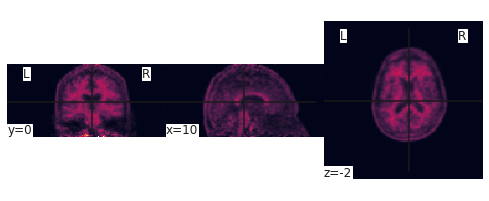

In [19]:
# plot first pet scan we can find
plotting.plot_img('./data/imaging/organized_imaging_data/' + '0028326' + '/session_1/pet_1/pet.nii.gz')

In [57]:
# show participant ID dirs
ID_dirs = [x for x in Path('./data/imaging/organized_imaging_data/').glob('*') if x.is_dir()]
ID_dirs[:5] # showing top 5

[PosixPath('data/imaging/organized_imaging_data/0028581'),
 PosixPath('data/imaging/organized_imaging_data/0028366'),
 PosixPath('data/imaging/organized_imaging_data/0028526'),
 PosixPath('data/imaging/organized_imaging_data/0028457'),
 PosixPath('data/imaging/organized_imaging_data/0028466')]

In [59]:
# create list of structural MRI scan fnames
prefix = './data/imaging/organized_imaging_data/'
mri_suffix = '/session_1/anat_1/anat.nii.gz'
id_list = [str(x).strip(prefix) for x in Path(prefix).glob('*') if x.is_dir()]
structural_mri_fnames = [prefix + id_no + mri_suffix for id_no in id_list]

## Problem statement.

**Can we predict an individual's MMSE, given their structural MRI and demographic information?**

#### Predictors
 - T1-weighted Structural MRI images
 - APOE4 carrier status
 - Age
 - Biological sex
 - Years of education

Since we are predicting MMSE, a numerical feature, our task is **regression.**

## Split data into training, validation, and testing sets.

In [61]:
from numpy.random import seed
seed(667) # seed random number, for reproducibility

In [118]:
np.random.shuffle(structural_mri_fnames)

In [104]:
N = len(id_list)
train_smri_fnames = structural_mri_fnames[0:int(0.6*N)] # 60% train
valid_smri_fnames = structural_mri_fnames[int(0.6*N):int(0.8*N)] # 20% valid
test_smri_fnames = structural_mri_fnames[int(0.8*N):N] # 20% test

#### Format the dataset for keras/tensorflow.

In [126]:
import nibabel as nib

# train_images = [nib.load(x).get_fdata() for x in train_smri_fnames]
valid_images = [nib.load(x).get_fdata() for x in valid_smri_fnames]
# test_images = [nib.load(x).get_fdata() for x in test_smri_fnames]

In [132]:
img = nib.load(train_smri_fnames[1])

In [144]:
img.get_fdata().shape

(160, 256, 256)

In [140]:
img.header

## Perform image preprocessing steps.

## Create the neural network (via Keras functional API).

[Keras: Multiple Inputs and Mixed Data](https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/)

In [60]:
import tensorflow as tf

In [ ]:
# specify certain info for model
data_shape = tuple(X_train.shape[1:]) # shape of input data
kernel_size = (3, 3) # size of convolution kernel
n_classes = 2 # number of output categories
filters = 16 # number of filters per layer

In [ ]:
# build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv3D(filters, kernel_size, activation='relu',input_shape=data_shape)
    tf.keras.layers.BatchNormalization()
    tf.keras.layers.MaxPooling3D()
    
    tf.keras.layers.Flatten()
    
    tf.keras.layers.Dense(256, activation='relu')
    tf.keras.layers.Dropout(0.5)
    
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

In [113]:
# specify model hyperparameters
nEpochs = 5
batch_size = 21 # must be divisior of training dataset

---

## Additional information

### [Neurodocker](https://hub.docker.com/r/repronim/neurodocker/)

### [Singularity](https://sylabs.io/about-us)

### [Nipype](https://nipype.readthedocs.io/en/latest/)

### [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki)

[FLIRT](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FLIRT)

 - Affine registration

Here is a video of affine transformation:

<video src='https://upload.wikimedia.org/wikipedia/commons/3/34/Affine_transformations.ogv' controls></video>

[MNI152 template brain](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Atlases)

### [Normalization of voxel intensities](https://blog.tensorflow.org/2018/07/an-introduction-to-biomedical-image-analysis-tensorflow-dltk.html)

### [Creating a TensorFlow dataset](https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata)

### [Keras: Multiple Inputs and Mixed Data](https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/)